In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [8]:
# Cargar el conjunto de datos Iris
iris = load_iris()
X = iris.data
y = iris.target

X = iris.data
X
y
iris.target_names
# One-hot encoding de las etiquetas de clase
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y.reshape(-1, 1))

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Definir la arquitectura del modelo
model = Sequential([
    Dense(10, activation='relu', input_shape=(4,)),  # Capa de entrada con 4 características
    Dense(10, activation='relu'),                    # Capa oculta
    Dense(3, activation='softmax')                   # Capa de salida con 3 clases
])

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

c:\Users\SENA\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Entrenar el modelo
historial=model.fit(X_train, y_train, epochs=50, batch_size=5, verbose=False)
print("Modelo Entrenado")

Modelo Entrenado


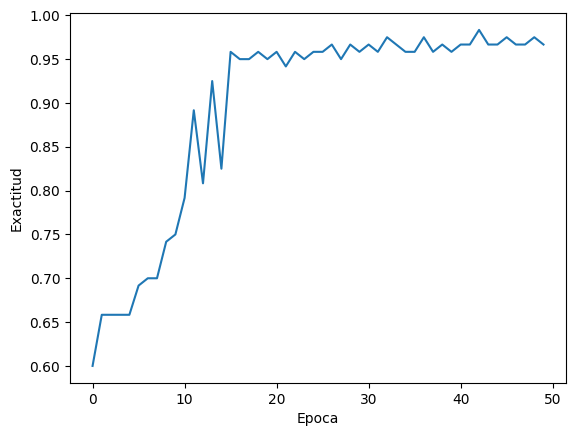

In [12]:
import matplotlib.pyplot as plt

plt.xlabel("Epoca")
plt.ylabel("Exactitud")
plt.plot(historial.history['accuracy'])
plt.show()

In [20]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f'Precisión del modelo en el conjunto de prueba: {accuracy:.2f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - accuracy: 1.0000 - loss: 0.1651
Precisión del modelo en el conjunto de prueba: 1.00


In [14]:
# Realizar una predicción
X_new = np.array([[1.0, 2.6, 0.1, 0.3]])  # Ejemplo de características de una nueva flor
prediction = model.predict(X_test)
predicted_class = np.argmax(prediction, axis=1)
predicted_species = encoder.inverse_transform(prediction)

print(f'Clase predicha: {predicted_class}')
print(f'Especie predicha: {predicted_species}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Clase predicha: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Especie predicha: [[1]
 [0]
 [2]
 [1]
 [1]
 [0]
 [1]
 [2]
 [1]
 [1]
 [2]
 [0]
 [0]
 [0]
 [0]
 [1]
 [2]
 [1]
 [1]
 [2]
 [0]
 [2]
 [0]
 [2]
 [2]
 [2]
 [2]
 [2]
 [0]
 [0]]
